In [1]:
#importing the data set
import pandas as pd
data = pd.read_excel('BankStatement.xlsx')

In [2]:
#Import libraries 
import pandas as pd
import numpy as np
import time
import gc
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn import preprocessing
from scipy.stats import zscore
#normalize the dataset
#import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from tqdm import tqdm

In [3]:
#to find the dimensions of the data
data.shape

(4119, 21)

In [4]:
#to find the headers
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
1,36,self-employed,single,basic.4y,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
2,38,technician,married,professional.course,no,yes,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes
3,34,admin.,married,university.degree,no,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
4,28,blue-collar,single,basic.9y,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no


In [5]:
#To understand the data well
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
#to figure out if any null values are present
data.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

Text(0.5, 1.0, 'Occupation count for the people')

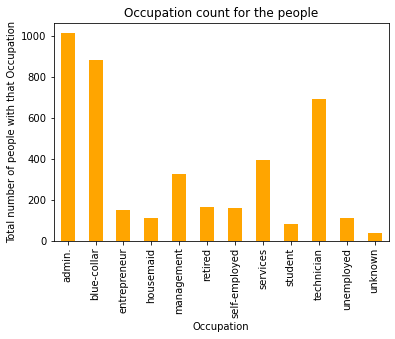

In [7]:
#creating visualizations for individual columns
age_bin = 10
jpbgroup=data.groupby(['job']).count()
jpbgroup.plot(kind='bar', color='orange',legend=None)
plt.xlabel('Occupation')
plt.ylabel('Total number of people with that Occupation')
plt.title('Occupation count for the people')

In [8]:
#descriptive statistics
data['job'].describe()

count       4119
unique        12
top       admin.
freq        1012
Name: job, dtype: object

In [9]:
#to understand mean range with respect to job for numerical values
data.groupby(['job']).mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.240119,261.871542,2.642292,944.025692,0.192688,0.061462,93.527008,-40.014723,3.601909,5165.542885
blue-collar,39.265837,261.852941,2.432127,983.270362,0.147059,0.235520,93.669430,-41.571493,3.742370,5174.265611
entrepreneur,42.202703,249.202703,2.216216,992.263514,0.141892,0.263514,93.614682,-40.839865,3.931493,5180.600000
housemaid,45.672727,229.663636,2.463636,980.909091,0.100000,0.426364,93.658536,-39.324545,4.009182,5179.862727
management,42.429012,246.799383,2.432099,953.015432,0.246914,-0.049691,93.483056,-40.591667,3.553451,5165.971914
retired,60.873494,311.789157,2.397590,897.301205,0.325301,-0.580120,93.487506,-39.034337,2.875741,5126.062048
self-employed,40.679245,254.924528,2.817610,967.691824,0.207547,0.086164,93.575283,-40.323899,3.669296,5166.974843
services,38.513995,232.529262,2.844784,978.773537,0.178117,0.067684,93.626059,-41.532061,3.552776,5165.806870
student,26.695122,287.134146,1.951220,902.426829,0.487805,-1.192683,93.448329,-39.665854,2.165354,5092.046341


In [10]:
#to understand standard deviation range with respect to job for numerical values
data.groupby(['job']).std()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,8.828773,281.194547,2.762349,227.254380,0.556791,1.609719,0.564158,4.745429,1.759308,76.341192
blue-collar,9.083514,249.304866,2.210068,124.068490,0.416101,1.440046,0.571472,4.100568,1.663464,62.349111
entrepreneur,9.235365,282.236765,2.114223,81.952895,0.387037,1.313361,0.551736,3.966917,1.472563,56.739685
housemaid,11.716145,197.119545,2.325279,133.548984,0.540981,1.515951,0.579479,4.400504,1.594287,75.998330
management,9.295188,208.489644,2.362966,209.035267,0.734482,1.516769,0.572315,4.483795,1.686725,70.142475
retired,9.407393,282.990369,2.277371,301.996558,0.723768,1.815730,0.692803,5.781923,1.943605,95.469753
self-employed,9.946897,265.867211,2.441351,174.302333,0.528617,1.542252,0.548186,4.327122,1.698767,72.547529
services,8.882764,211.917749,3.402255,140.494996,0.483218,1.524678,0.578924,4.191420,1.745116,68.492073
student,4.531615,260.934350,1.562701,295.528154,0.804983,1.652591,0.777807,6.167922,1.771785,89.982944


Text(0.5, 1.0, 'Educational qualification for the people')

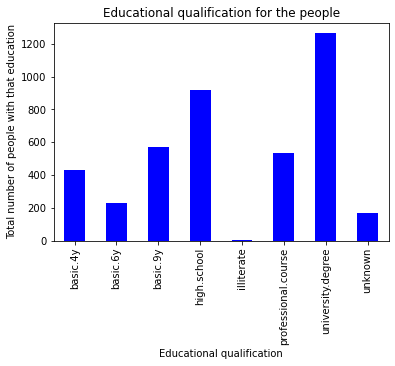

In [11]:
age_bin = 100
jpbgroup=data.groupby(['education']).count()
jpbgroup.plot(kind='bar', color='blue',legend=None)
plt.xlabel('Educational qualification')
plt.ylabel('Total number of people with that education')
plt.title('Educational qualification for the people')

In [12]:
data['education'].describe()

count                  4119
unique                    8
top       university.degree
freq                   1264
Name: education, dtype: object

In [13]:
data.groupby(['education']).std()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
basic.4y,11.998504,239.910580,2.154453,157.225796,0.443874,1.505288,0.562736,4.470717,1.666075,70.549440
basic.6y,8.304827,258.128285,2.611336,113.858940,0.360548,1.401429,0.567057,3.966704,1.606210,59.152415
basic.9y,9.140190,240.527586,2.326835,136.309935,0.462509,1.455686,0.573845,4.191238,1.655002,63.070573
high.school,9.645409,261.551373,2.954084,197.637103,0.542542,1.577265,0.586147,4.610184,1.764888,73.578428
illiterate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
professional.course,9.874111,300.646382,2.401494,197.151385,0.511631,1.553704,0.578970,4.702918,1.722437,75.929943
university.degree,9.707178,241.178450,2.581878,219.556469,0.601985,1.621557,0.566992,4.706623,1.763584,78.280306
unknown,12.233660,234.796448,2.396656,235.674130,0.777729,1.676053,0.624201,4.602961,1.878283,84.991680


In [14]:
data.groupby(['education']).mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
basic.4y,47.657343,255.682984,2.421911,973.524476,0.142191,0.291841,93.666193,-40.465501,3.828089,5174.093939
basic.6y,40.144737,259.000000,2.649123,985.881579,0.140351,0.271053,93.689114,-41.539912,3.810469,5176.600000
basic.9y,39.231707,250.538328,2.348432,979.963415,0.158537,0.183275,93.640805,-41.443554,3.722737,5173.182578
high.school,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595
illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000
professional.course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140
university.degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479


Text(0.5, 1.0, 'Housing status of people')

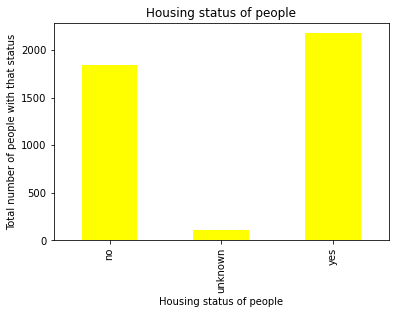

In [15]:
age_bin = 100
jpbgroup=data.groupby(['housing']).count()
jpbgroup.plot(kind='bar', color='yellow',legend=None)
plt.xlabel('Housing status of people')
plt.ylabel('Total number of people with that status')
plt.title('Housing status of people')

In [16]:
data['housing'].describe()

count     4119
unique       3
top        yes
freq      2175
Name: housing, dtype: object

In [17]:
data.groupby(['housing']).mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
housing,,,,,,,,,,
no,40.213159,260.585644,2.588363,964.982599,0.172376,0.176998,93.636321,-40.358728,3.719115,5168.835454
unknown,39.523810,243.923810,2.580952,961.190476,0.285714,0.228571,93.634800,-40.207619,3.743962,5171.364762
yes,40.057931,254.198161,2.491954,956.529195,0.200920,0.000230,93.529174,-40.631862,3.532779,5164.255816


In [18]:
data.groupby(['housing']).std()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
housing,,,,,,,,,,
no,10.348194,263.060251,2.683058,180.664933,0.509089,1.535665,0.576427,4.468868,1.707474,73.253679
unknown,9.117919,209.279565,2.209163,190.902064,0.716754,1.528745,0.550635,4.237531,1.717736,73.736166
yes,10.341072,249.513559,2.483766,200.998526,0.558121,1.583422,0.578747,4.712248,1.752154,73.973839


Text(0.5, 1.0, 'Marital status of people')

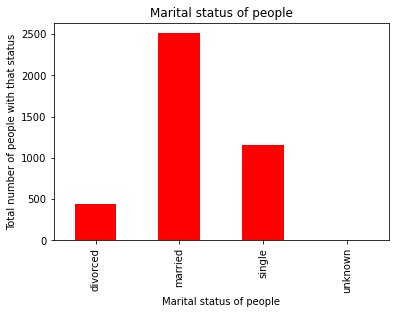

In [19]:
%matplotlib inline
age_bin = 100
jpbgroup=data.groupby(['marital']).count()
jpbgroup.plot(kind='bar', color='red',legend=None)
plt.xlabel('Marital status of people')
plt.ylabel('Total number of people with that status')
plt.title('Marital status of people')

In [20]:
data['marital'].describe()

count        4119
unique          4
top       married
freq         2509
Name: marital, dtype: object

In [21]:
data.groupby(['marital']).mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,45.107623,263.163677,2.542601,972.255605,0.174888,0.143274,93.600547,-40.621973,3.707177,5170.145964
married,42.389398,256.289757,2.527700,964.162216,0.173774,0.172260,93.599039,-40.357114,3.728554,5170.724472
single,33.209020,254.647875,2.555941,947.338248,0.233304,-0.128448,93.529971,-40.768257,3.352657,5155.756114
unknown,42.272727,336.272727,2.545455,999.000000,0.090909,0.181818,93.537545,-39.690909,3.855182,5174.409091


In [22]:
data.groupby(['marital']).std()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,10.081336,293.313205,2.358199,161.019148,0.537072,1.518718,0.574055,4.424042,1.691403,70.536890
married,9.993669,251.230116,2.486272,182.766367,0.509180,1.520955,0.570921,4.498845,1.684501,70.369896
single,7.318678,246.753203,2.806961,220.595186,0.608277,1.649639,0.598017,4.852961,1.826598,80.682019
unknown,12.092071,182.948676,3.236159,0.000000,0.301511,1.589225,0.454871,4.266018,1.636611,55.852206


Text(0.5, 1.0, 'Loan status of people')

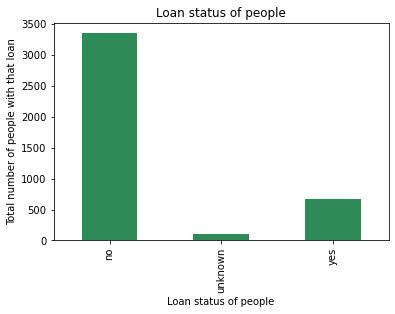

In [23]:
%matplotlib inline
age_bin = 100
jpbgroup=data.groupby(['loan']).count()
jpbgroup.plot(kind='bar', color='seagreen',legend=None)
plt.xlabel('Loan status of people')
plt.ylabel('Total number of people with that loan')
plt.title('Loan status of people')

In [24]:
data['loan'].describe()

count     4119
unique       3
top         no
freq      3349
Name: loan, dtype: object

In [25]:
data.groupby(['loan']).mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
loan,,,,,,,,,,
no,40.163332,259.236787,2.564049,959.856972,0.190206,0.081188,93.582737,-40.512213,3.612484,5165.858107
unknown,39.523810,243.923810,2.580952,961.190476,0.285714,0.228571,93.634800,-40.207619,3.743962,5171.364762
yes,39.956391,246.487218,2.395489,963.147368,0.175940,0.081353,93.555732,-40.479098,3.646675,5168.851128


In [26]:
data.groupby(['loan']).std()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
loan,,,,,,,,,,
no,10.324971,256.673702,2.657776,193.268611,0.534876,1.559058,0.579216,4.587464,1.736964,74.242504
unknown,9.117919,209.279565,2.209163,190.902064,0.716754,1.528745,0.550635,4.237531,1.717736,73.736166
yes,10.441441,251.253508,2.120961,185.427890,0.543880,1.589920,0.584303,4.688527,1.720617,70.723724


Text(0.5, 1.0, 'Contact type of people')

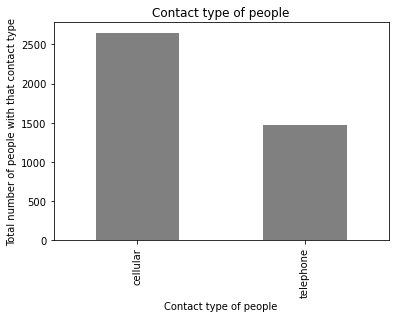

In [27]:
%matplotlib inline
age_bin = 100
jpbgroup=data.groupby(['contact']).count()
jpbgroup.plot(kind='bar', color='grey',legend=None)
plt.xlabel('Contact type of people')
plt.ylabel('Total number of people with that contact type')
plt.title('Contact type of people')

In [28]:
data['contact'].describe()


count         4119
unique           2
top       cellular
freq          2652
Name: contact, dtype: object

In [29]:
data.groupby(['contact']).mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
contact,,,,,,,,,,
cellular,40.016214,262.126697,2.373680,943.199472,0.277149,-0.360709,93.332208,-41.360256,3.118162,5152.155882
telephone,40.289707,247.137014,2.832993,991.556919,0.033401,0.890661,94.027121,-38.942331,4.531015,5192.379482


In [30]:
data.groupby(['contact']).std()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
contact,,,,,,,,,,
cellular,10.714010,254.854038,2.343292,228.750046,0.638656,1.640892,0.499067,4.935696,1.814915,80.696456
telephone,9.547536,254.234116,2.908810,85.661673,0.220633,0.992703,0.425799,3.388074,1.095196,49.257442


Text(0.5, 1.0, 'Outcome of the previous marketing campaign')

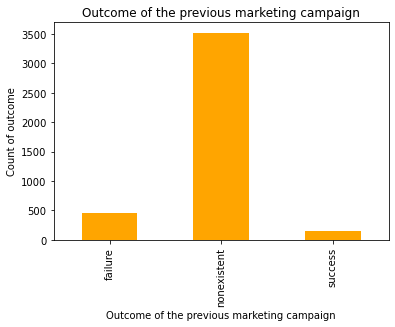

In [31]:
%matplotlib inline
age_bin = 100
jpbgroup=data.groupby(['poutcome']).count()
jpbgroup.plot(kind='bar', color='orange',legend=None)
plt.xlabel('Outcome of the previous marketing campaign')
plt.ylabel('Count of outcome')
plt.title('Outcome of the previous marketing campaign')

In [32]:
data['contact'].describe()

count         4119
unique           2
top       cellular
freq          2652
Name: contact, dtype: object

In [33]:
data.groupby(['contact']).mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
contact,,,,,,,,,,
cellular,40.016214,262.126697,2.373680,943.199472,0.277149,-0.360709,93.332208,-41.360256,3.118162,5152.155882
telephone,40.289707,247.137014,2.832993,991.556919,0.033401,0.890661,94.027121,-38.942331,4.531015,5192.379482


In [34]:
data.groupby(['contact']).std()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
contact,,,,,,,,,,
cellular,10.714010,254.854038,2.343292,228.750046,0.638656,1.640892,0.499067,4.935696,1.814915,80.696456
telephone,9.547536,254.234116,2.908810,85.661673,0.220633,0.992703,0.425799,3.388074,1.095196,49.257442


Text(0.5, 1.0, 'Does a user has credit in default?')

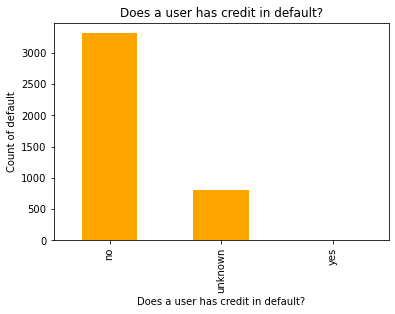

In [35]:
%matplotlib inline
age_bin = 100
jpbgroup=data.groupby(['default']).count()
jpbgroup.plot(kind='bar', color='orange',legend=None)
plt.xlabel('Does a user has credit in default?')
plt.ylabel('Count of default')
plt.title('Does a user has credit in default?')

In [36]:
data.previous.describe()

count    4119.000000
mean        0.190337
std         0.541788
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: previous, dtype: float64

In [37]:
data.age.describe()

count    4119.000000
mean       40.113620
std        10.313362
min        18.000000
25%        32.000000
50%        38.000000
75%        47.000000
max        88.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'number of contacts performed before this campaign ')

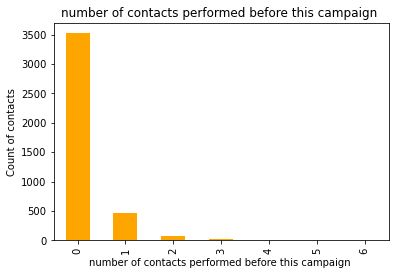

In [38]:
%matplotlib inline
age_bin = 100
jpbgroup=data.groupby(['previous']).count()
jpbgroup.plot(kind='bar', color='orange',legend=None)
plt.xlabel('number of contacts performed before this campaign ')
plt.ylabel('Count of contacts')
plt.title('number of contacts performed before this campaign ')

Text(0.5, 1.0, 'number of people having housing loan')

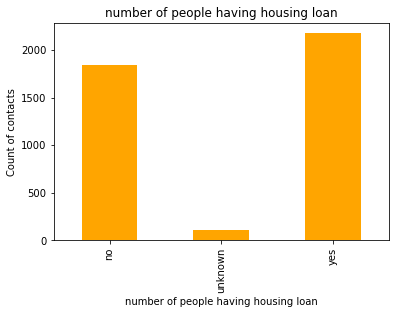

In [39]:
%matplotlib inline
age_bin = 100
jpbgroup=data.groupby(['housing']).count()
jpbgroup.plot(kind='bar', color='orange',legend=None)
plt.xlabel('number of people having housing loan')
plt.ylabel('Count of contacts')
plt.title('number of people having housing loan')

In [40]:
data['housing'].describe()

count     4119
unique       3
top        yes
freq      2175
Name: housing, dtype: object

In [41]:
data.groupby(['housing']).mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
housing,,,,,,,,,,
no,40.213159,260.585644,2.588363,964.982599,0.172376,0.176998,93.636321,-40.358728,3.719115,5168.835454
unknown,39.523810,243.923810,2.580952,961.190476,0.285714,0.228571,93.634800,-40.207619,3.743962,5171.364762
yes,40.057931,254.198161,2.491954,956.529195,0.200920,0.000230,93.529174,-40.631862,3.532779,5164.255816


In [42]:
data.groupby(['housing']).std()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
housing,,,,,,,,,,
no,10.348194,263.060251,2.683058,180.664933,0.509089,1.535665,0.576427,4.468868,1.707474,73.253679
unknown,9.117919,209.279565,2.209163,190.902064,0.716754,1.528745,0.550635,4.237531,1.717736,73.736166
yes,10.341072,249.513559,2.483766,200.998526,0.558121,1.583422,0.578747,4.712248,1.752154,73.973839


In [43]:
#created a method for deriving relationship between features and class label. 
def plot_bar(column):
    # temp df 
    temp = pd.DataFrame()
    # count categorical values
    temp['Deposit subscribed'] = data[data['y'] == 'no'][column].value_counts()
    temp['Deposit not subscribed'] = data[data['y'] == 'yes'][column].value_counts()
    temp.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show();

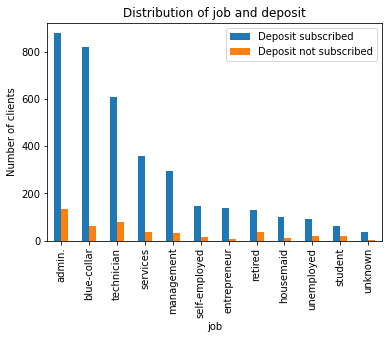

,job,y
count,4119,4119
unique,12,2
top,admin.,no
freq,1012,3668


In [44]:
#Just pass the column name with which you want to find the relation of class label.Used describe method for statistical analysys
plot_bar('job')
data[['job','y']].describe()

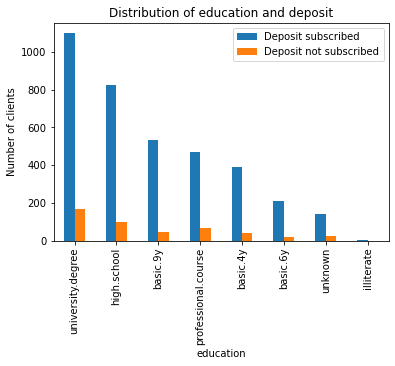

,education,y
count,4119,4119
unique,8,2
top,university.degree,no
freq,1264,3668


In [45]:
plot_bar('education')
data[['education','y']].describe()

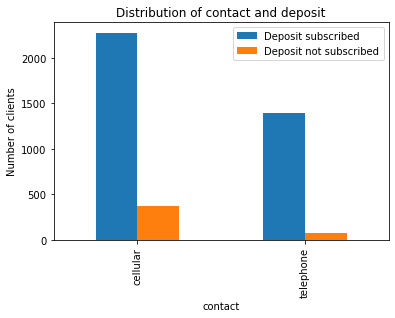

,contact,y
count,4119,4119
unique,2,2
top,cellular,no
freq,2652,3668


In [46]:
plot_bar('contact')
data[['contact','y']].describe()

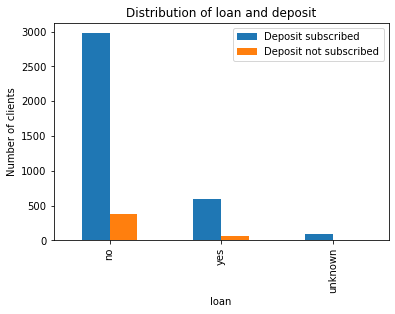

,loan,y
count,4119,4119
unique,3,2
top,no,no
freq,3349,3668


In [47]:
plot_bar('loan')
data[['loan','y']].describe()

In [48]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [49]:
data[['poutcome','y']].describe()
data[['loan','y']].describe()

,loan,y
count,4119,4119
unique,3,2
top,no,no
freq,3349,3668


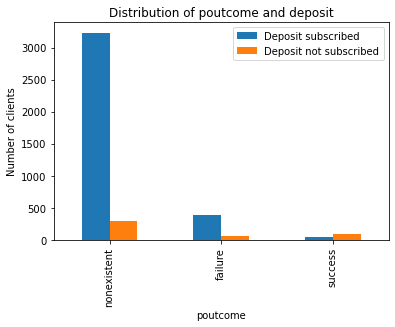

In [50]:
plot_bar('poutcome')

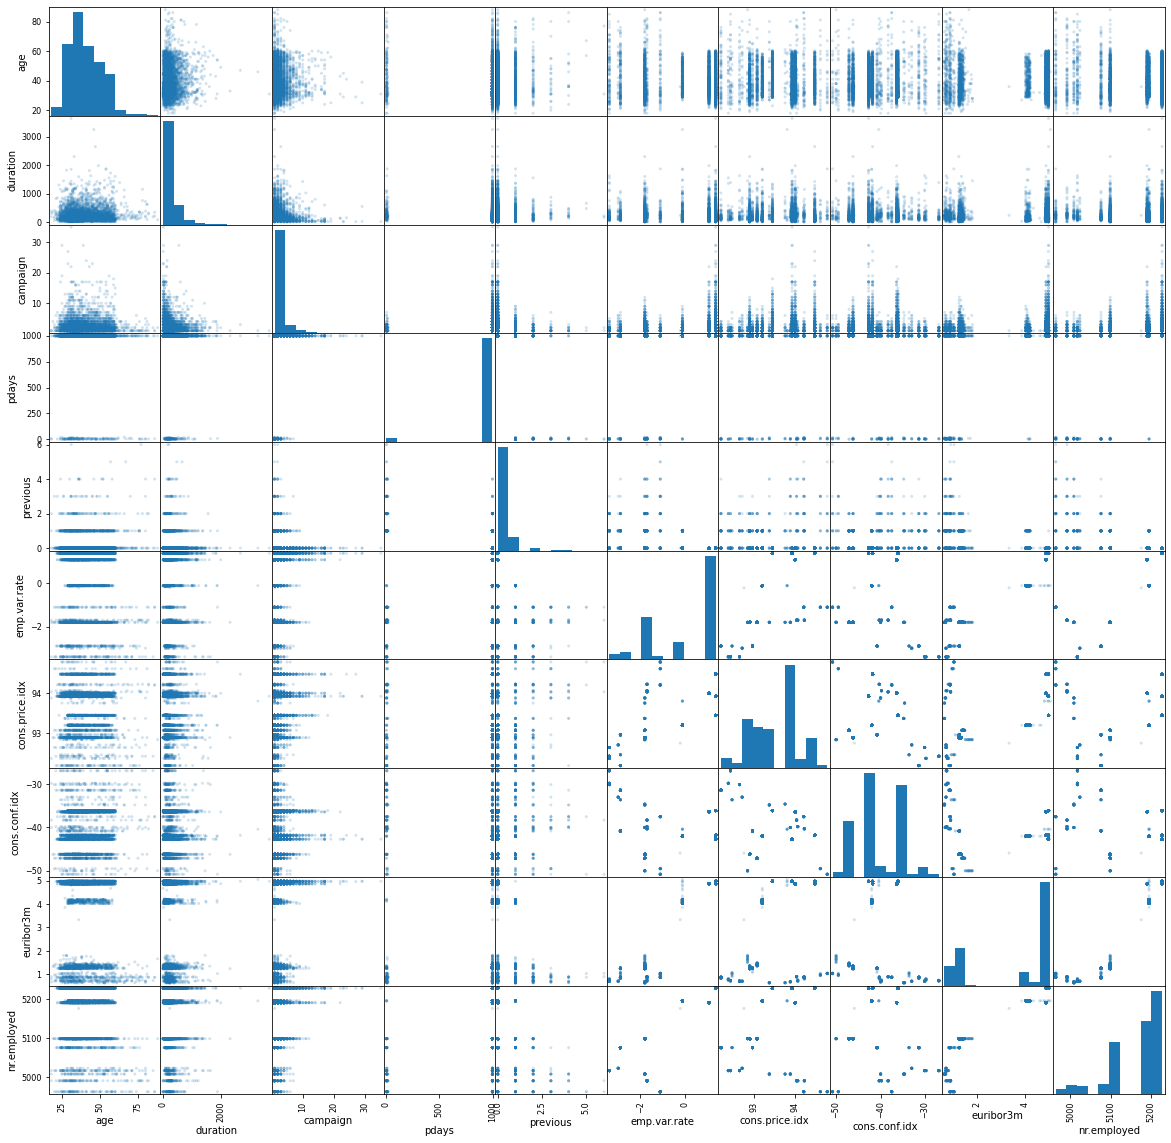

In [51]:
#scatter matrix for numercial columns
import pandas as pd
pd.plotting.scatter_matrix(data,alpha =0.2, figsize=(20,20))
plt.show()

In [52]:
# Convert target variable into numeric
data.y = data.y.map({'no':0, 'yes':1}).astype('uint8')

In [53]:
# correlation matrix 
correlation_matrix = data.corr()
correlation_matrix.style.background_gradient(axis=0, low=0.75, high=1.0)  

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.041299,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936,0.060374
duration,0.041299,1.000000,-0.085348,-0.046998,0.025724,-0.028848,0.016672,-0.034745,-0.032329,-0.044218,0.418565
campaign,-0.014169,-0.085348,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037,-0.076091
pdays,-0.043425,-0.046998,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983,-0.332012
previous,0.050931,0.025724,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853,0.255697
emp.var.rate,-0.019192,-0.028848,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173,-0.283216
cons.price.idx,-0.000482,0.016672,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560,-0.098326
cons.conf.idx,0.098135,-0.034745,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054,0.054393
euribor3m,-0.015033,-0.032329,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589,-0.298565
nr.employed,-0.041936,-0.044218,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000,-0.349241


In [54]:
#converted contact into binary values
data['contact'] = data['contact'].replace(['cellular', 'telephone'],[1,0])

In [55]:
#Convertes these columns into binary
data['loan'] = data['loan'].replace(['yes', 'unknown', 'no'],[1,0,0])
data['housing'] = data['housing'].replace(['yes', 'unknown', 'no'],[1,0,0])
data['default'] = data['default'].replace(['yes', 'unknown', 'no'],[1,0,0])

In [56]:
data['poutcome'] = data['poutcome'].replace(['nonexistent','failure','success'], [0,0,1])

In [57]:
#replaced with 0 because 999 represents no connection made
data.pdays = data.pdays.replace(999, 0)                     
data.previous = data.previous.apply(lambda x: 1 if x > 0 else 0).astype('uint8')


In [58]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,25,services,married,high.school,0,1,0,0,jun,wed,...,1,0,0,0,1.4,94.465,-41.8,4.962,5228.1,0
1,36,self-employed,single,basic.4y,0,0,0,1,jul,thu,...,1,0,0,0,1.4,93.918,-42.7,4.968,5228.1,0
2,38,technician,married,professional.course,0,1,0,1,aug,mon,...,1,0,0,0,1.4,93.444,-36.1,4.965,5228.1,1
3,34,admin.,married,university.degree,0,0,0,1,aug,tue,...,1,0,0,0,1.4,93.444,-36.1,4.963,5228.1,0
4,28,blue-collar,single,basic.9y,0,1,0,0,jun,wed,...,1,0,0,0,1.4,94.465,-41.8,4.864,5228.1,0


In [59]:
# fucntion to One Hot Encoding
def encode(data, col):
    return pd.concat([data, pd.get_dummies(col, prefix=col.name)], axis=1)

In [60]:
#encoded categorical values into numerical ones
data = encode(data, data.job)
data = encode(data, data.month)
data = encode(data, data.day_of_week)
data = encode(data, data.marital)
data = encode(data, data.education)

In [61]:
#dropped the existing colummns to avoid redundancy
data.drop(['job', 'month', 'day_of_week','marital','education'], axis=1, inplace=True)

In [62]:
#dropped duplicted values
data.drop_duplicates(inplace=True) 

In [63]:
data.head()

,age,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,...,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,25,0,1,0,0,227,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,36,0,0,0,1,148,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,38,0,1,0,1,479,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,34,0,0,0,1,109,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,0,1,0,0,525,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [64]:
# duration method to create priority on the basis of duration of call made
def duration(data):
    data.loc[data['duration'] <= 100, 'duration'] = 1
    data.loc[(data['duration'] > 100) & (data['duration'] <= 200)  , 'duration'] = 2
    data.loc[(data['duration'] > 200) & (data['duration'] <= 300)  , 'duration'] = 3
    data.loc[(data['duration'] > 300) & (data['duration'] <= 400), 'duration'] = 4
    data.loc[(data['duration'] > 400) & (data['duration'] <= 500), 'duration'] = 5
    data.loc[(data['duration'] > 500) & (data['duration'] <= 600), 'duration'] = 6
    data.loc[data['duration']  > 645, 'duration'] = 7
    return data
duration(data);

In [65]:
data.head()

,age,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,...,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,25,0,1,0,0,3,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,36,0,0,0,1,2,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,38,0,1,0,1,5,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,34,0,0,0,1,2,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,0,1,0,0,6,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [66]:
#converted negative values into positive values
data['emp.var.rate'] = data['emp.var.rate'].apply(lambda x: x* -1 if x < 0 else x*1)
print(data['emp.var.rate'])

0       1.4
1       1.4
2       1.4
3       1.4
4       1.4
       ... 
4114    3.4
4115    2.9
4116    1.1
4117    3.4
4118    3.4
Name: emp.var.rate, Length: 4119, dtype: float64


In [67]:
data['cons.conf.idx'] = data['cons.conf.idx'] * -1
print(data['cons.conf.idx'])

0       41.8
1       42.7
2       36.1
3       36.1
4       41.8
        ... 
4114    30.1
4115    31.4
4116    49.5
4117    29.8
4118    30.1
Name: cons.conf.idx, Length: 4119, dtype: float64


In [68]:
# astype('uint8') normalizes data in range 0 - 255
import numpy as np
data['nr.employed'] = np.log2(data['nr.employed']).astype('uint8')
data['cons.price.idx'] = np.log2(data['cons.price.idx']).astype('uint8')
data['cons.conf.idx'] = np.log2(data['cons.conf.idx']).astype('uint8')
print(data['nr.employed'])
print(data['cons.price.idx'])
print(data['cons.conf.idx'])

0       12
1       12
2       12
3       12
4       12
        ..
4114    12
4115    12
4116    12
4117    12
4118    12
Name: nr.employed, Length: 4119, dtype: uint8
0       6
1       6
2       6
3       6
4       6
       ..
4114    6
4115    6
4116    6
4117    6
4118    6
Name: cons.price.idx, Length: 4119, dtype: uint8
0       5
1       5
2       5
3       5
4       5
       ..
4114    4
4115    4
4116    5
4117    4
4118    4
Name: cons.conf.idx, Length: 4119, dtype: uint8


In [69]:
# Normalized data so that it consumes less space
data.euribor3m = data.euribor3m.astype('uint8')
data.campaign = data.campaign.astype('uint8')
data.pdays = data.pdays.astype('uint8')
print(data.pdays)

0        0
1        0
2        0
3        0
4        0
        ..
4114     3
4115     4
4116    14
4117     3
4118     6
Name: pdays, Length: 4119, dtype: uint8


In [70]:
#divided dataset into input and output columns
X = data.drop('y', axis='columns')
y= data['y']

In [71]:
X.describe()

,age,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,...,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,...,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,0.000243,0.528041,0.161447,0.643846,11.652828,2.537266,0.227725,0.144695,0.034474,...,0.279922,0.002671,0.104151,0.055353,0.139354,0.223598,0.000243,0.129886,0.306871,0.040544
std,10.313362,0.015581,0.499274,0.367987,0.478920,73.548049,2.568159,1.369053,0.351836,0.182466,...,0.449015,0.051615,0.305494,0.228696,0.346358,0.416706,0.015581,0.336219,0.461251,0.197255
min,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,0.000000,1.000000,0.000000,1.000000,4.000000,3.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,88.000000,1.000000,1.000000,1.000000,1.000000,645.000000,35.000000,21.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
y.describe()

count    4119.000000
mean        0.109493
std         0.312294
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: y, dtype: float64

In [73]:
#divided data for first suite
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.5, random_state=11)

In [74]:
#divided data for second suite
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.4, random_state=11)

In [75]:
#divided data for third suite
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=11)

In [76]:
display('Shape of splitted train and test sets for first suite', X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape)

'Shape of splitted train and test sets for first suite'

(2059, 54)

(2059,)

(2060, 54)

(2060,)

In [77]:
display('Shape of splitted train and test sets for second suite', X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape)

'Shape of splitted train and test sets for second suite'

(2471, 54)

(2471,)

(1648, 54)

(1648,)

In [78]:
display('Shape of splitted train and test sets for third suite', X_train3.shape, y_train3.shape, X_test3.shape, y_test3.shape)

'Shape of splitted train and test sets for third suite'

(3295, 54)

(3295,)

(824, 54)

(824,)

In [79]:
# Hyper parametering for K for first suite
from sklearn.model_selection import cross_val_score 
import numpy as np
neighbors = list(range(1, 50,2))
cv_scores =[]
for k in neighbors:
    knn =KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train1, y_train1, cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())  
k_best = neighbors[np.argmax(cv_scores)]  
print('cv_scores:', cv_scores)
print('k_best:',k_best)

cv_scores: [0.8722756334359459, 0.8805209566658775, 0.8848804167653327, 0.8839213829031495, 0.8873218091404216, 0.889751361591286, 0.8916883731944116, 0.8921761780724605, 0.8892682926829268, 0.8916931091641015, 0.8921785460573053, 0.8936372247217619, 0.8926687189201991, 0.8941250295998107, 0.8931541558134029, 0.8926687189201991, 0.8941321335543453, 0.8926758228747337, 0.8931588917830927, 0.8912147762254321, 0.8907269713473834, 0.8916978451337914, 0.8912100402557425, 0.8907246033625386, 0.8907246033625386]
k_best: 33


In [80]:
#finding time and accuracy for first suite
start = time.time()
from sklearn.metrics import accuracy_score 
knn = KNeighborsClassifier(n_neighbors=33)  
knn_trained = knn.fit(X_train1, y_train1)  
y_test_pred1 =knn_trained.predict(X_test1)
end = time.time()
print('It lasted for {} sec'.format(round(end - start, 3)))
acc = accuracy_score(y_test1, y_test_pred1)  
print('accuracy for first suite:', acc)

It lasted for 0.255 sec
accuracy for first suite: 0.8932038834951457


In [81]:
# Hyper parametering for K for second suite
from sklearn.model_selection import cross_val_score 
import numpy as np
neighbors = list(range(1, 50,2))
cv_scores =[]
for k in neighbors:
    knn =KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train2, y_train2, cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())  
k_best = neighbors[np.argmax(cv_scores)]  
print('cv_scores:', cv_scores)
print('k_best:',k_best)

cv_scores: [0.8721219145879587, 0.8838546428105003, 0.8891080057463758, 0.8895144965391146, 0.889512864045971, 0.8911339297374952, 0.8931582212354708, 0.8939679378346609, 0.8939679378346611, 0.894779286926995, 0.8927549954290193, 0.8935647120282095, 0.8951841452265901, 0.8927549954290193, 0.8923485046362807, 0.8935647120282095, 0.8935647120282095, 0.8911355622306386, 0.8907307039310435, 0.891945278829829, 0.892754995429019, 0.8931598537286142, 0.8931598537286144, 0.8935647120282093, 0.8931598537286144]
k_best: 25


In [82]:
#finding time and accuracy for second suite
start = time.time()
from sklearn.metrics import accuracy_score 
knn = KNeighborsClassifier(n_neighbors=25)  
knn_trained = knn.fit(X_train2, y_train2)  
y_test_pred2 =knn_trained.predict(X_test2)
end = time.time()
print('It lasted for {} sec'.format(round(end - start, 3)))
acc = accuracy_score(y_test2, y_test_pred2)  
print('accuracy for second suite:', acc)

It lasted for 0.263 sec
accuracy for second suite: 0.9004854368932039


In [83]:
# Hyper parametering for K for third suite
neighbors = list(range(1, 50,2))
cv_scores =[]
for k in neighbors:
    knn =KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train3, y_train3, cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())  
k_best = neighbors[np.argmax(cv_scores)]  
print('cv_scores:', cv_scores)
print('k_best:',k_best)

cv_scores: [0.8798176291793313, 0.8864935064935064, 0.890435663627153, 0.8949875656258636, 0.898325504282951, 0.8977185226121398, 0.8986322188449847, 0.8974127291148568, 0.8989324859537626, 0.8983236621534493, 0.8983301096067053, 0.8992428847747999, 0.8995449940130793, 0.8986349820392373, 0.898331030671456, 0.8989389334070186, 0.8992410426452981, 0.8986349820392373, 0.898027079303675, 0.8980270793036752, 0.8980270793036752, 0.8971152252003314, 0.8971143041355806, 0.8968121948973014, 0.8955973104909274]
k_best: 25


In [84]:
#finding time and accuracy for third suite
start = time.time()
knn = KNeighborsClassifier(n_neighbors=25)  
knn_trained = knn.fit(X_train3, y_train3)  
y_test_pred3 =knn_trained.predict(X_test3)
end = time.time()
print('It lasted for {} sec'.format(round(end-start,3)))
acc = accuracy_score(y_test3, y_test_pred3)  
print('accuracy for third suite:', acc)

It lasted for 0.182 sec
accuracy for third suite: 0.8919902912621359


In [85]:
#Confusion matrix for first suite for KNN
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1, y_test_pred1)

array([[1822,   10],
       [ 210,   18]], dtype=int64)

In [86]:
#Confusion matrix for second suite
confusion_matrix(y_test2, y_test_pred2)

array([[1458,    9],
       [ 155,   26]], dtype=int64)

In [87]:
#Confusion matrix for third suite
confusion_matrix(y_test3, y_test_pred3)

array([[718,   6],
       [ 83,  17]], dtype=int64)

In [88]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [89]:
#precision for first suite for KNN model
precision_score(y_test1, y_test_pred1)

0.6428571428571429

In [90]:
#precision for second suite for KNN model
precision_score(y_test2, y_test_pred2)


0.7428571428571429

In [91]:
#precision for third suite for KNN model
precision_score(y_test3, y_test_pred3)

0.7391304347826086

In [92]:
#Recall for first suite for KNN model
recall_score(y_test1, y_test_pred1)

0.07894736842105263

In [93]:
#Recall for second suite for KNN model
recall_score(y_test2, y_test_pred2)

0.143646408839779

In [94]:
#Recall for third suite for KNN model
recall_score(y_test3, y_test_pred3)

0.17

In [95]:
#f1_score for first suite for KNN model
f1_score(y_test1, y_test_pred1)

0.140625

In [96]:
#f1_score for second suite for KNN model
f1_score(y_test2, y_test_pred2)

0.24074074074074073

In [97]:
#f1_score for third suite for KNN model
f1_score(y_test3, y_test_pred3)

0.2764227642276423

In [98]:
#random forest model training for first suite
start = time.time()
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train1, y_train1)
y_pred11 = classifier.predict(X_test1)
end=time.time()
print('It lasted for {}'.format(round(end-start,3)))
accuracy_score(y_test1,y_pred11)

It lasted for 0.192


0.9063106796116505

In [99]:
#random forest model training for second suite
start = time.time()
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train2, y_train2)
y_pred22 = classifier.predict(X_test2)
end= time.time()
print('It lasted for {}'.format(round(end-start,3)))
accuracy_score(y_test2,y_pred22)

It lasted for 0.223


0.9035194174757282

In [100]:
#random forest model training for third suite
start = time.time()
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train3, y_train3)
y_pred33 = classifier.predict(X_test3)
end=time.time()
print('It lasted for {}'.format(round(end-start,3)))
accuracy_score(y_test3,y_pred33)

It lasted for 0.227


0.8992718446601942

In [101]:
#precision for first suite for random forest model

precision_score(y_test1, y_pred11)

0.6635514018691588

In [102]:
#precision for second suite for random forest model
precision_score(y_test2, y_pred22)

0.6375

In [103]:
#precision for third suite for random forest model
precision_score(y_test3, y_pred33)

0.6808510638297872

In [104]:
#recall for first suite for random forest model
recall_score(y_test1, y_pred11)

0.31140350877192985

In [105]:
#recall for second suite for random forest model
recall_score(y_test2, y_pred22)

0.281767955801105

In [106]:
#recall for third suite for random forest model
recall_score(y_test3, y_pred33)

0.32

In [107]:
#confusion matrix for first suite for random forest model
confusion_matrix(y_test1, y_pred11)

array([[1796,   36],
       [ 157,   71]], dtype=int64)

In [108]:
#confusion matrix for second suite for random forest model
confusion_matrix(y_test2, y_pred22)

array([[1438,   29],
       [ 130,   51]], dtype=int64)

In [109]:
#confusion matrix for third suite for random forest model
confusion_matrix(y_test3, y_pred33)

array([[709,  15],
       [ 68,  32]], dtype=int64)

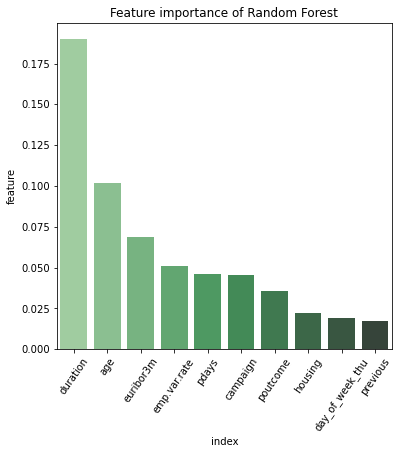

In [110]:
#feature importance graph for random forest for first suit
def featureimportance(model, X_train1, y_train1):
    
    models = RandomForestClassifier()
    models.fit(X_train1, y_train1)
    data = pd.DataFrame(models.feature_importances_, X_train1.columns, columns=["feature"])
    data = data.sort_values(by='feature', ascending=False).reset_index()
    plt.figure(figsize=[6,6])
    sns.barplot(x='index', y='feature', data=data[:10], palette="Greens_d")
    plt.title('Feature importance of Random Forest')
    plt.xticks(rotation=55)
    plt.show();
featureimportance(RandomForestClassifier, X_train2, y_train2)    

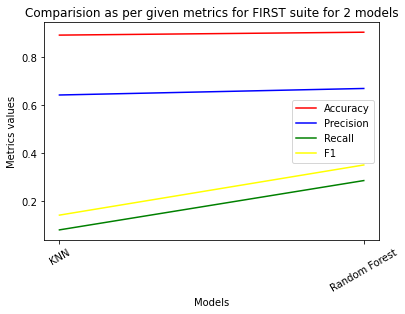

In [111]:
#metrics comparison for first suite for both the models
model = {0:'KNN',1:'Random Forest'}
accuracy = {0:0.8932038834951457,1:0.9053398058252428}
precison = {0:0.6428571428571429,1:0.6701030927835051}
Recall= {0:0.07894736842105263,1:0.2850877192982456}
F1Score = {0:0.140625,1:0.35031847133757965}
plt.plot(model.values(), accuracy.values(), c='r')
plt.plot(model.values(), precison.values(), c='b')
plt.plot(model.values(), Recall.values(), c='g')
plt.plot(model.values(), F1Score.values(), c='yellow')
plt.xlabel('Models')
plt.xticks(rotation=30)
plt.ylabel('Metrics values')
plt.title('Comparision as per given metrics for FIRST suite for 2 models')
plt.legend(['Accuracy', 'Precision','Recall','F1'])
plt.show();

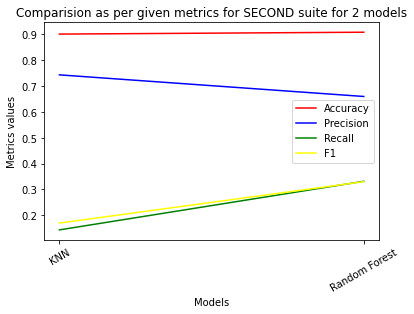

In [112]:
#metrics comparison for second suite for both the models
model = {0:'KNN',1:'Random Forest'}
accuracy = {0:0.9004854368932039,1:0.9077669902912622}
precison = {0:0.7428571428571429,1:0.6593406593406593}
Recall= {0:0.143646408839779,1:0.3314917127071823}
F1Score = {0:0.17,1:0.33}
plt.plot(model.values(), accuracy.values(), c='r')
plt.plot(model.values(), precison.values(), c='b')
plt.plot(model.values(), Recall.values(), c='g')
plt.plot(model.values(), F1Score.values(), c='yellow')
plt.xlabel('Models')
plt.xticks(rotation=30)
plt.ylabel('Metrics values')
plt.title('Comparision as per given metrics for SECOND suite for 2 models')
plt.legend(['Accuracy', 'Precision','Recall','F1'])
plt.show();

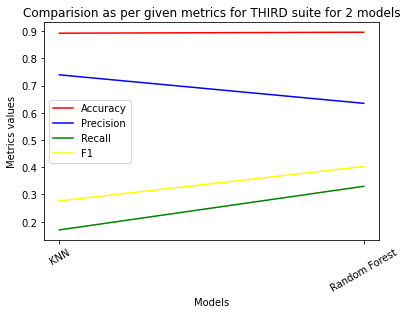

In [113]:
#metrics comparison for third suite for both the models
model = {0:'KNN',1:'Random Forest'}
accuracy = {0:0.8919902912621359,1:0.8956310679611651}
precison = {0:0.7391304347826086,1:0.6346153846153846}
Recall= {0:0.17,1:0.33}
F1Score = {0:0.2764227642276423,1:0.40268456375838924}
plt.plot(model.values(), accuracy.values(), c='r')
plt.plot(model.values(), precison.values(), c='b')
plt.plot(model.values(), Recall.values(), c='g')
plt.plot(model.values(), F1Score.values(), c='yellow')
plt.xlabel('Models')
plt.xticks(rotation=30)
plt.ylabel('Metrics values')
plt.title('Comparision as per given metrics for THIRD suite for 2 models')
plt.legend(['Accuracy', 'Precision','Recall','F1'])
plt.show();